# Convertir los archivos de SHP a Kml

In [1]:
import os
import glob
import geopandas as gpd
import pandas as pd

In [2]:
os.chdir(r"F:\Curso_MINEM\Diapositiva\Dia_3\Datos\SHP")

In [3]:
os.getcwd()

'F:\\Curso_MINEM\\Diapositiva\\Dia_3\\Datos\\SHP'

In [4]:
## Lista zip
lista_shp = glob.glob("*.shp")
lista_shp

['Predio.shp']

In [6]:
shp = os.getcwd() + "\\" + lista_shp[0]
shp

'F:\\Curso_MINEM\\Diapositiva\\Dia_3\\Datos\\SHP\\Predio.shp'

In [7]:
Vuelo_shp = gpd.read_file(shp)

In [8]:
Vuelo_shp.head(3)

,Id,Propiet,geometry
0,3,Concesion_1,"POLYGON ((522776.299 9064228.724, 523132.294 9..."
1,4,Concesion_2,"POLYGON ((523686.382 9065982.858, 523439.482 9..."
2,5,Concesion_3,"POLYGON ((525532.384 9066135.016, 525027.102 9..."


In [9]:
Campo_vuelo = list(Vuelo_shp["Propiet"])

In [10]:
len(Campo_vuelo)

8

In [11]:
for name in Campo_vuelo:
    print("Nombre es:",name)

Nombre es: Concesion_1
Nombre es: Concesion_2
Nombre es: Concesion_3
Nombre es: Concesion_4
Nombre es: Concesion_5
Nombre es: Concesion_6
Nombre es: Concesion_7
Nombre es: Concesion_8


In [12]:
# Seleccion por campo de atributo
Vuelo_x = Vuelo_shp[Vuelo_shp["Propiet"] == Campo_vuelo[4]]

<Axes: >

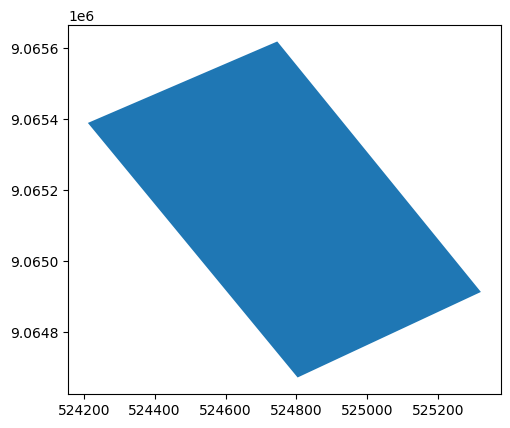

In [13]:
Vuelo_x.plot()

In [14]:
# Concatenar string o texto 
out_dir = os.path.normpath((os.getcwd() + '/Plan_vuelo' ))
out_dir

'F:\\Curso_MINEM\\Diapositiva\\Dia_3\\Datos\\SHP\\Plan_vuelo'

In [15]:
# Crear la carpeta en el directorio
os.makedirs(out_dir)

In [16]:
name_kml = out_dir +"\\"+ Campo_vuelo[1] + "_Plan.kml"
name_kml

'F:\\Curso_MINEM\\Diapositiva\\Dia_3\\Datos\\SHP\\Plan_vuelo\\Concesion_2_Plan.kml'

In [17]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
Vuelo_x.to_file(name_kml, driver="KML")

In [18]:
for i in Campo_vuelo:
    Vuelo_x = Vuelo_shp[Vuelo_shp["Propiet"] == i]
    name_kml = out_dir +"\\"+ i + "_Plan.kml"
    gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
    Vuelo_x.to_file(name_kml, driver="KML")
    print("Proceso finalizado "+ i)

Proceso finalizado Concesion_1
Proceso finalizado Concesion_2
Proceso finalizado Concesion_3
Proceso finalizado Concesion_4
Proceso finalizado Concesion_5
Proceso finalizado Concesion_6
Proceso finalizado Concesion_7
Proceso finalizado Concesion_8
